# 一、导入库、数据

In [1]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
# 画图的包
import seaborn as sns #画图的包
# 设置画图的风格
plt.style.use('fivethirtyeight')

import  warnings
warnings.filterwarnings('ignore') #有警告忽略  即输出结果出不显示

In [2]:
# 导入数据
trdata=pd.read_csv('Survived.csv')
trdata_=trdata.copy(deep=True)
trdata_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 二、数据的探索

In [3]:
# info  基本信息
trdata_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# shape 形状
trdata_.shape

(891, 12)

### 1. 数据的描述统计  查看数据总体的情况

In [5]:
# trdata_.describe()
trdata_.describe([0.25,0.45,0.5,0.75,0.9,0.99]).T  #便于观察

# 数据分布较为稀松，大多极差值较大
# Survived、SibSp、Parch 数据集中在3/4的分位差和最大值之间

,count,mean,std,min,25%,45%,50%,75%,90%,99%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,401.5,446.0000,668.5,802.0000,882.10000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0,0.0000,1.0,1.0000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0,3.0000,3.0,3.0000,3.00000,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,27.0,28.0000,38.0,50.0000,65.87000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0,0.0000,1.0,1.0000,5.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0,0.0000,0.0,2.0000,4.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,13.0,14.4542,31.0,77.9583,249.00622,512.3292


### 是否幸存的人数统计

In [6]:
trdata.Survived.value_counts()
# 0 未幸存  1 幸存

0    549
1    342
Name: Survived, dtype: int64

### 幸存的情况

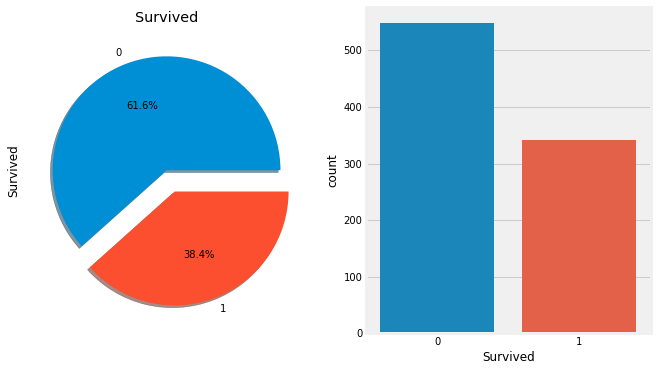

In [7]:
f,ax=plt.subplots(1,2,figsize=(10,6))
trdata['Survived'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
# 画图
sns.countplot('Survived',
              data=trdata,ax=ax[1]);

In [8]:
# 不同性别下的统计
trdata.groupby(['Sex','Survived']).count()
# 各特征依据性别进行统计

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [9]:
# 不同性别下的幸存人数
# groupby 性别
# count  人数统计
trdata.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

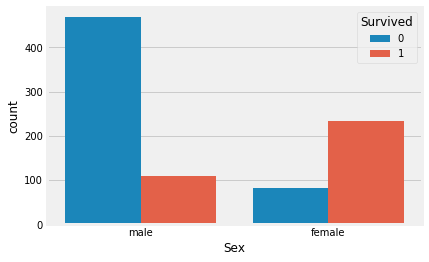

In [10]:
# 用sns画图
sns.countplot('Sex',hue='Survived',data=trdata);
# 根据此图初步得知男性存活人数比女性少

##### Pclass和幸存人数之间的关系

In [11]:
# crosstab  交叉表
pd.crosstab(trdata.Pclass,trdata.Survived,margins=True).style.background_gradient(cmap='GnBu_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


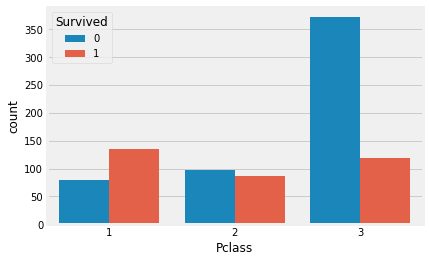

In [12]:
# 依据幸存情况对Pclass类别进行幸存人数统计
sns.countplot('Pclass',hue='Survived'  #幸存人数中分为男性幸存人数和女性幸存人数
              ,data=trdata);
# 由图得知船舱等级高的幸存人数较多，低等级的船舱不幸的人数较多

In [13]:
# 按幸存人数、性别统计各等级船舱的幸存情况
pd.crosstab([trdata.Survived,trdata.Sex],trdata.Pclass,
            margins=True).style.background_gradient(cmap='cool')
#margins=True   显示行列合计
# style.background_gradient 交叉表的背景色设置

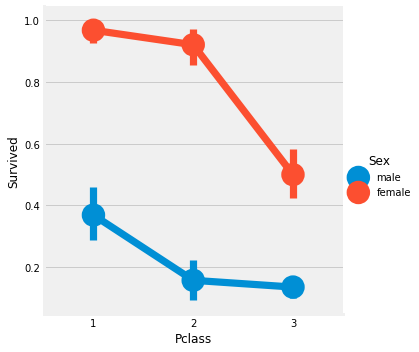

In [14]:
sns.factorplot('Pclass','Survived',hue='Sex',data=trdata);
# 不同Pclass下的男女的幸存lv

# 三、 缺失值的填补

In [15]:
# 查看各列的缺失情况
# 缺失数量
trdata_.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# 缺失比例
trdata_.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [17]:
trdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1、年龄的缺失值填补

In [18]:
# 运用正则表达式提取出Name中的Mr、Mrs的信息
trdata['initial']=trdata.Name.str.extract('([A-Za-z]+)\.')
trdata['initial']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: initial, Length: 891, dtype: object

In [19]:
# 查看不同性别下的initial的情况
pd.crosstab(trdata.initial,trdata.Sex)
# 为方便查看将其转换成横向的  转置一下
pd.crosstab(trdata.initial,trdata.Sex).T

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [20]:
# initial （姓氏）主要集中在Master、Miss、Mr、Mrs这几类中，
# 可以将其他数量较小的合并到一起，命名为other

In [21]:
# 分箱
result=[]
for i in trdata.initial.values:
    if i !='Master' and i !='Miss' and i !='Mr' and i !='Mrs':
        result.append(i.replace(i,'other'))
    else:
        result.append(i)

In [22]:
# 新加一列存放划分和合并后的结果
trdata['result']=result
trdata.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,result
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss


In [23]:
# 查看result的结果（不包含重复项，每个都是唯一的）
trdata.result.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'other'], dtype=object)

In [24]:
# set 集合也可以达到这样的效果
set(result)

{'Master', 'Miss', 'Mr', 'Mrs', 'other'}

In [25]:
# 统计不同姓氏下的男女人数
pd.crosstab(trdata.result,trdata.Sex).T

result,Master,Miss,Mr,Mrs,other
Sex,,,,,
female,0,182,0,125,7
male,40,0,517,0,20


In [26]:
# 不同情况下的幸存人数的统计
trdata.groupby(trdata.result)['Sex'].count()

result
Master     40
Miss      182
Mr        517
Mrs       125
other      27
Name: Sex, dtype: int64

取一种姓氏求得年龄的均值并且结果取整

In [27]:
# 不同姓氏下的平均年龄
trdata.groupby('result')['Age'].mean()

result
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
other     42.384615
Name: Age, dtype: float64

In [28]:
# 取出Master的平均年龄的结果，只取整数
int(trdata.groupby('result')['Age'].mean()[0])

4

运用循环填补年龄的缺失值

In [29]:
trdata.result.values

array(['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs',
       'Mrs', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mrs', 'Master', 'Mr',
       'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr',
       'Miss', 'Mr', 'other', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr',
       'Miss', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr',
       'Miss', 'Mr', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr',
       'Miss', 'Mr', 'Miss', 'Master', 'Mr', 'Miss', 'Mr', 'Master', 'Mr',
       'Master', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr',
       'Mr', 'Mr', 'Mr', 'Mr', 'Master', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr',
       'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr',
       'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr',
       'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss',
       'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss',
       'Mr', 'Master', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'M

In [30]:
trdata.Age.isnull

<bound method Series.isnull of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [31]:
# 循环取出不同姓氏下年龄是缺失的索引号及缺失值
for i in trdata.result.values:
    c=trdata.loc[(trdata.Age.isnull())&(trdata.result==i),'Age']
    print(c)

5     NaN
17    NaN
26    NaN
29    NaN
36    NaN
42    NaN
45    NaN
46    NaN
48    NaN
55    NaN
64    NaN
76    NaN
77    NaN
87    NaN
95    NaN
101   NaN
107   NaN
121   NaN
126   NaN
154   NaN
158   NaN
168   NaN
181   NaN
185   NaN
196   NaN
201   NaN
214   NaN
223   NaN
250   NaN
260   NaN
       ..
650   NaN
656   NaN
667   NaN
674   NaN
692   NaN
711   NaN
718   NaN
732   NaN
738   NaN
739   NaN
740   NaN
760   NaN
768   NaN
773   NaN
776   NaN
778   NaN
783   NaN
790   NaN
793   NaN
815   NaN
825   NaN
826   NaN
828   NaN
832   NaN
837   NaN
839   NaN
846   NaN
859   NaN
868   NaN
878   NaN
Name: Age, Length: 119, dtype: float64
19    NaN
31    NaN
140   NaN
166   NaN
186   NaN
256   NaN
334   NaN
347   NaN
367   NaN
375   NaN
415   NaN
431   NaN
457   NaN
533   NaN
578   NaN
669   NaN
849   NaN
Name: Age, dtype: float64
28    NaN
32    NaN
47    NaN
82    NaN
109   NaN
128   NaN
180   NaN
198   NaN
229   NaN
235   NaN
240   NaN
241   NaN
264   NaN
274   NaN
300   NaN
303  

In [32]:
# 循环取出不同姓氏下的年龄的均值并取整
# 相同的姓氏的年龄均值相同
# 显示所有的
for i in trdata.result.values:
    d=int(trdata.groupby('result')['Age'].mean()[i])
    print(d)

32
35
21
35
32
32
32
4
35
35
21
21
32
32
21
35
4
32
35
35
32
32
21
32
21
35
32
32
21
32
42
35
21
32
32
32
32
32
21
21
35
35
32
21
21
32
32
21
32
35
4
32
35
35
32
32
21
32
21
4
32
21
32
4
32
4
35
32
21
32
32
21
32
32
32
32
32
32
4
21
32
32
21
32
21
35
32
32
21
32
32
32
32
32
32
32
32
32
35
32
21
32
32
32
32
32
21
32
32
21
32
21
32
21
21
32
32
32
32
21
32
32
32
21
32
4
32
32
21
32
32
32
35
35
32
32
21
32
32
32
35
21
35
32
32
32
32
21
32
42
42
35
32
32
32
32
21
32
32
4
32
35
32
32
4
4
35
35
32
32
32
4
21
32
32
32
4
21
32
32
21
32
4
4
21
32
35
32
32
32
35
32
21
4
35
21
32
32
21
21
32
32
32
32
32
21
32
32
21
32
32
21
32
32
32
21
21
32
21
32
32
32
32
32
32
32
32
32
32
21
35
32
32
21
32
21
32
21
32
32
21
21
32
32
32
42
21
35
32
42
32
35
32
32
35
35
35
21
21
35
32
4
32
32
21
32
32
32
35
21
32
32
35
32
21
21
21
32
4
35
32
32
32
32
32
32
32
32
32
21
21
35
32
21
32
32
32
21
32
35
21
32
32
21
32
4
21
35
32
21
21
21
35
32
32
21
35
42
21
35
32
32
21
35
32
21
32
35
35
21
21
32
32
32
35
32
32
21
32
32

In [33]:
# 用不同姓氏下年龄均值填补索引出来的缺失值  索引出赋予新值即可填补空缺
for i in trdata.result.values:
    trdata.loc[(trdata.Age.isnull())&(trdata.result==i),'Age']=int(trdata.groupby('result')['Age'].mean()[i])

In [34]:
# 查看年龄是否全部填补成功
trdata.Age.isnull().sum()

# 结果为0表明所有的缺失值都填补完成

0

In [35]:
trdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
initial          0
result           0
dtype: int64

### 对年龄划分区间，即分箱

In [36]:
trdata.Age.values

array([22.  , 38.  , 26.  , 35.  , 35.  , 32.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 32.  ,
       31.  , 35.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 32.  ,
       19.  , 21.  , 32.  , 40.  , 35.  , 21.  , 66.  , 28.  , 42.  ,
       32.  , 21.  , 18.  , 14.  , 40.  , 27.  , 32.  ,  3.  , 19.  ,
       32.  , 32.  , 21.  , 32.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 32.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 32.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 32.  , 32.  ,  0.83, 30.  , 22.  ,
       29.  , 21.  , 28.  , 17.  , 33.  , 16.  , 32.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 32.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 32.  , 21.  , 33.  , 37.  , 28.  , 21.  , 32.  ,
       38.  , 21.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 32.  , 32.5 , 32.5 , 54.  , 12.  ,
       32.  , 24.  ,

In [37]:
trdata['Age_band']=0 #初始各年龄区间的人数值为0
trdata.loc[trdata['Age']<=18,'Age_band']=0
trdata.loc[(trdata['Age']>18)&(trdata['Age']<=30),'Age_band']=2
trdata.loc[(trdata['Age']>30)&(trdata['Age']<=50),'Age_band']=3
trdata.loc[(trdata['Age']>50),'Age_band']=4
trdata.Age_band

0      2
1      3
2      2
3      3
4      3
5      3
6      4
7      0
8      2
9      0
10     0
11     4
12     2
13     3
14     0
15     4
16     0
17     3
18     3
19     3
20     3
21     3
22     0
23     2
24     0
25     3
26     3
27     2
28     2
29     3
      ..
861    2
862    3
863    2
864    2
865    3
866    2
867    3
868    3
869    0
870    2
871    3
872    3
873    3
874    2
875    0
876    2
877    2
878    3
879    4
880    2
881    3
882    2
883    2
884    2
885    3
886    2
887    2
888    2
889    2
890    3
Name: Age_band, Length: 891, dtype: int64

In [38]:
trdata.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,result,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,3


### 2、处理Embarked

In [39]:
trdata.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

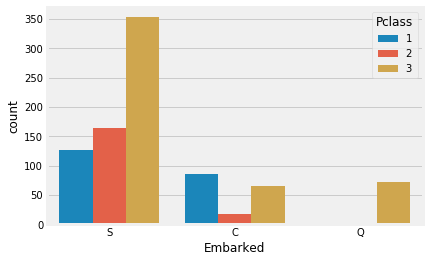

In [40]:
# 画图查看不同航班下Pclass的情况
sns.countplot('Embarked',hue='Pclass',data=trdata);

In [41]:
# 对Embarked的空缺值进行填补
# 鉴于上图中Embarked为S的较多，故而填补是可以用S填补
trdata['Embarked'].fillna('S',inplace=True)

In [42]:
# 查看Embarked的填补情况
trdata.Embarked.isnull().sum()

0

In [43]:
# 任何的缺失值
trdata.Embarked.isnull().any()
# False 表示不存在任何缺失值

False

### 针对文本值进行编码量化处理,为便于后续建模

In [44]:
# 编码的包存在预处理的库中，归一化标准化也存在预处理库中
# 预处理库
from sklearn import preprocessing

In [45]:
# 标签有专门的的编码包：标签编码  LabelEncoder
preprocessing.LabelEncoder

sklearn.preprocessing.label.LabelEncoder

In [46]:
lb=preprocessing.LabelEncoder()
trdata['Sex']=lb.fit_transform(trdata['Sex'])
trdata['Embarked']=lb.fit_transform(trdata['Embarked'])
trdata['result']=lb.fit_transform(trdata['result'])

In [47]:
# 查看航班编码后的结果
trdata['Embarked'].unique()

array([2, 0, 1], dtype=int64)

In [48]:
# 查看性别编码后的结果
trdata.Sex.unique()

array([1, 0], dtype=int64)

In [49]:
# 查看姓氏编码后的结果
trdata.result.unique()

array([2, 3, 1, 0, 4], dtype=int64)

#### 图形直观了解一些数据

In [50]:
# Seaborn 简称 sns 中的distplot  集合了matplotlib中的hist()图和kdeplot()图
# 效果 直方图和展示数据分布状态的曲线

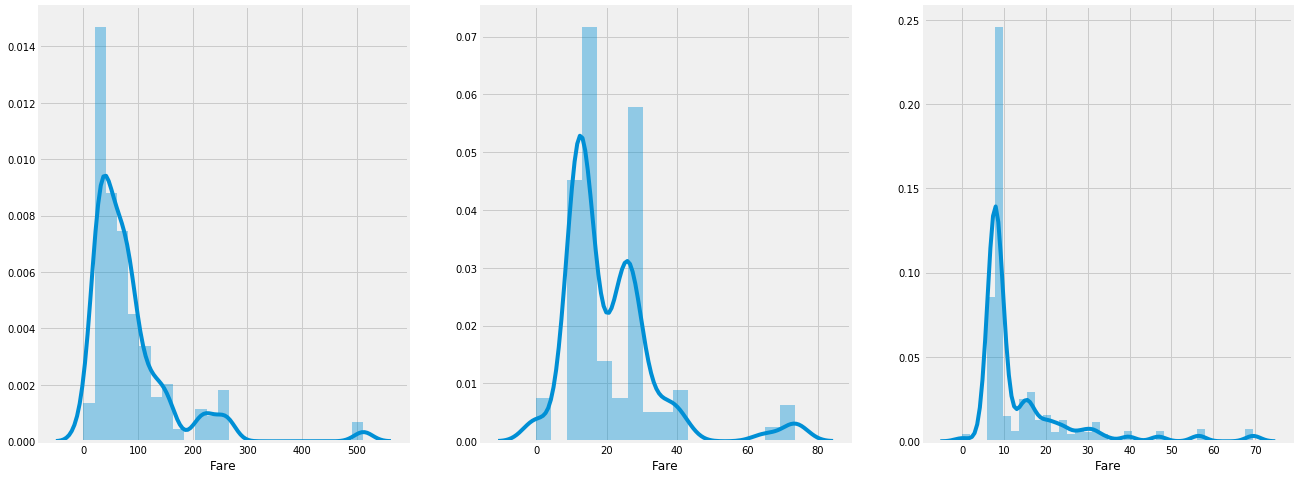

In [51]:
# 准备画布
f,ax=plt.subplots(1,3,figsize=(20,8))
# 画图
sns.distplot(trdata[trdata.Pclass==1].Fare,ax=ax[0])
sns.distplot(trdata[trdata.Pclass==2].Fare,ax=ax[1])
sns.distplot(trdata[trdata.Pclass==3].Fare,ax=ax[2]);
# 3中不同的船舱的下的票价Fare的分布状态

#### 删除缺失值过多的列及通过观察判断得知与预测y没有关系的列

In [52]:
trdata.drop(["PassengerId","Age","Ticket","Cabin","initial"],inplace=True,axis=1)
# axis=1 删除整列

In [53]:
trdata.drop(['Name'],inplace=True,axis=1)

直观了解各个特征之间的相关性

In [54]:
trdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int32
result      891 non-null int32
Age_band    891 non-null int64
dtypes: float64(1), int32(3), int64(5)
memory usage: 52.3 KB


In [55]:
trdata.describe().T
# Fare的数据分布差异较大

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.0,0.0000,1.0000,1.0,1.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Embarked,891.0,1.536476,0.791503,0.0,1.0000,2.0000,2.0,2.0000
result,891.0,1.906846,0.798361,0.0,2.0000,2.0000,2.0,4.0000
Age_band,891.0,2.246914,1.137551,0.0,2.0000,2.0000,3.0,4.0000


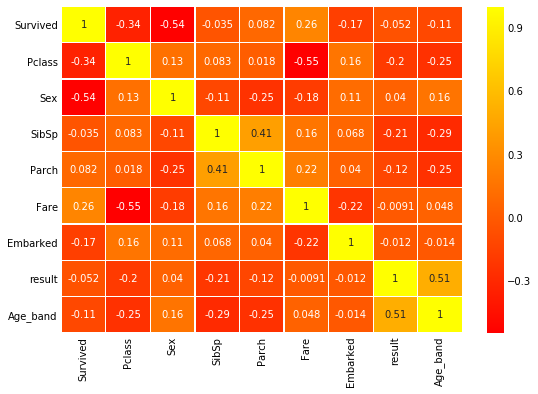

In [56]:
# sns中的相关性热图
sns.heatmap(trdata.corr(),annot=True,linewidths=0.2,cmap='autumn')

# 若未事先准备画布，可以在后面追加下面这一行代码
fig=plt.gcf()
# 设置画布的尺寸
fig.set_size_inches(8,6)

# 保存图片  一般保存在代码文件相同的路径下
plt.savefig('heatmap.png') #png格式
plt.savefig('heatmap.jpg') #jpg格式


# Survived分别与Pclass、Sex相关性较高
# Pclass与Fare  0.55
# SibSp与Parch  0.41

#  四、划分数据集

划分数据前的准备工作

In [57]:
trdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int32
result      891 non-null int32
Age_band    891 non-null int64
dtypes: float64(1), int32(3), int64(5)
memory usage: 52.3 KB


In [58]:
# 划分特征、标签
X=trdata.loc[:,trdata.columns!='Survived']  #出幸存情况外的都为特征
y=trdata.loc[:,trdata.columns=='Survived']  #标签  我们研究的目标对象

In [59]:
# 特征情况
X.shape

(891, 8)

In [60]:
# 标签情况
y.shape

(891, 1)

正式划分数据集

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=10)

# 六、建模

In [63]:
# 导入算法
from sklearn.neighbors import KNeighborsClassifier  #kNN、k近邻
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB  #朴素贝叶斯家族
from sklearn.linear_model import LogisticRegression,LinearRegression  #回归

In [64]:
# 模型效果的评估
from sklearn import metrics
from sklearn.metrics import confusion_matrix #混淆矩阵
from sklearn.model_selection import cross_val_score   #交叉验证

标签是二分类的，首先考线性情况中的逻辑回归

### 6.1 **逻辑回归**

In [65]:
logr=LogisticRegression()
logr.fit(Xtrain,Ytrain)
logr.score(Xtest,Ytest)

0.8212290502793296

In [66]:
# 预测结果
logr_pre=logr.predict(Xtest)
logr_pre

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [67]:
#accuracy 准确性
# 先传真实值，再传预测值
metrics.accuracy_score(Ytest,logr_pre)
# 判对的概率  0.82

0.8212290502793296

In [68]:
# precision 精确度
# 先传真实值、再传预测值
metrics.precision_score(Ytest,logr_pre)
# 少数类判对的概率
# 衡量多数类的判错后所需的成本

0.7678571428571429

In [69]:
# 召回率
metrics.recall_score(Ytest,logr_pre)

0.6935483870967742

In [70]:
# f1 Score  追求的目标  使precision和recall之间的一个平衡处
metrics.f1_score(Ytest,logr_pre)

0.7288135593220338

**混淆矩阵（判断的正确、错误情况）** 

In [71]:
from sklearn.model_selection import cross_val_predict

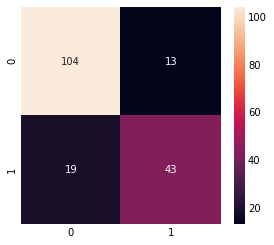

In [72]:
# 画混淆矩阵图
# 准备画布
plt.figure(figsize=(4,4))
# logistic模型
logr=LogisticRegression()
logr=logr.fit(Xtrain,Ytrain)
logr_pre=logr.predict(Xtest)
# 画图
sns.heatmap(confusion_matrix(Ytest,logr_pre),annot=True,  #显示数字
            fmt='2.0f');  # 2.0f  整数

# 0 多数类   1 少数类
# 目标  true=1 pre=1 在所在的行和列占比，尽量使两者达到平衡

### **运用网格搜索进行选取最佳组合参数值**

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
ran=np.linspace(0.1,0.9,9)
param_grid={'penalty':['l1','l2'],
           'C':ran}


GR=GridSearchCV(logr,param_grid,cv=5)

# fit
GR.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
# 输出最佳参数值组合
GR.best_params_

{'C': 0.9, 'penalty': 'l2'}

In [76]:
# 输出最佳的模型训练效果
GR.best_score_

0.7991573033707865

选用网格搜索的最佳参数得出的模型评估效果不如按照默认参数值的模型评估效果好

### 6.2**KNN  k近邻**

核心：k值   1、经验设定k 2、设定范围，运用学习曲线查看模型训练效果最佳时的k值

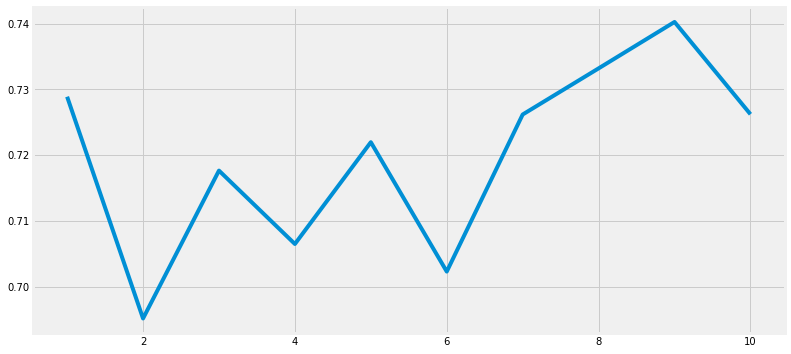

In [77]:
score_knn=[]

for i in list(range(1,11)):
    KNN=KNeighborsClassifier(n_neighbors=i)
    CVS=cross_val_score(KNN,Xtrain,Ytrain,cv=5) #5折交叉验证
    score_knn.append(CVS.mean()) #为观察趋势并寻找最佳的k值，此处选取均值

# 画图
plt.plot([*range(1,11)],score_knn) #[*range(1,11)]解压出数值
# 后置画布
fig=plt.gcf()
# 设置画布的尺寸
fig.set_size_inches(12,6)

In [78]:
max(score_knn)

0.7402738106963459

In [79]:
# 通过上图选定k=9
KNN=KNeighborsClassifier(n_neighbors=9)
KNN.fit(Xtrain,Ytrain)
KNN.score(Xtest,Ytest)

0.7597765363128491

### 6.3 **决策树**

In [80]:
DTC=DecisionTreeClassifier()
DTC.fit(Xtrain,Ytrain)
DTC.score(Xtest,Ytest)

0.7877094972067039

- 接下来运用网格搜索寻找最佳参数值

In [81]:
# 导入网格搜索的包
from sklearn.model_selection import GridSearchCV 

In [82]:
param_grid={'criterion':['entropy','gini'],
           'max_depth':range(2,10),
           'min_samples_leaf':range(1,10),
           'min_samples_split':range(2,10)}
# 设置网格
GR=GridSearchCV(DTC,param_grid,cv=5)
# 建模
GR.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': range(2, 10), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [83]:
help(param_grid)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwarg

In [84]:
# 输出最佳的参数值组合
GR.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [85]:
# 查看最佳的模型训练效果
GR.best_score_

0.824438202247191

- 根据网格得出的最佳参数值组合训练模型并用测试集评估模型训练的效果

In [86]:
DTC_good=DecisionTreeClassifier(criterion='gini',max_depth=7,
                                min_samples_leaf=5,min_samples_split=2)
DTC_good.fit(Xtrain,Ytrain)
DTC_good.score(Xtest,Ytest)

0.8603351955307262

***

***查看特征重要性排名***

In [87]:
DTC.feature_importances_

array([0.11298878, 0.3247174 , 0.08007973, 0.02916112, 0.30125528,
       0.03193592, 0.04274482, 0.07711695])

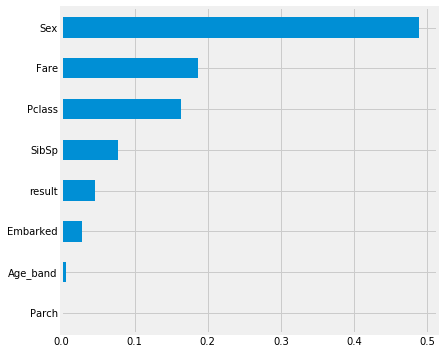

In [88]:
# 画图做一个排行榜
f=plt.figure(figsize=(6,6))
DTC=DecisionTreeClassifier(criterion='gini',
                           max_depth=7,min_samples_leaf=7,
                           min_samples_split=2).fit(Xtrain,Ytrain)
pd.Series(DTC.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.5);

- Series 对象中的sort_value函数 按值进行排序 ascending=True 表示降序排序
- plot.barh(width=0.5) 画水平的条形图，柱子宽度0.5
- 纵坐标是特征名

- ROC曲线

In [89]:
ytr_pred=DTC.predict(Xtest)
ytr_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.metrics import auc,roc_curve #计算roc和auc
# help(auc)

In [91]:
# 计算真正率和假正率 阈值threshold
fpr,tpr,threshold=roc_curve(Ytest,ytr_pred)
# roc_curve(y_true,y_score,pos_label=None)   pos_label=None 适合而分类数据{0,1} {-1,1}

In [92]:
print('fpr','tpr','threshold',sep='\n')
[fpr,tpr,threshold]
# threshold 返回的结果是y_score 内元素去重后加入一个‘最大值+1’的值降序排序后组成的数据
# 如 y_pre=np.array([1,1,0,0])  threshold=np.array([2,1,0])
# array([2, 1, 0], dtype=int64)中 threshold[0]=2,表示假定y_pre中所有大于等于2的元素对应的y_true的样本是正样本，其他的负样本
# array([2, 1, 0]中没有大于等于2的，故而fpr=0、tpr=0
# threshold[1]=1,大于等于1的有2个，真正率 tpr[1]=2/3=0.67741935  
# 假正率:预测为正样本的真实也为正样本的占预测为正样本的比重 

fpr
tpr
threshold


[array([0.        , 0.05982906, 1.        ]),
 array([0.        , 0.67741935, 1.        ]),
 array([2, 1, 0], dtype=int64)]

In [93]:
roc_auc=auc(fpr,tpr)
roc_auc

0.8087951475048248

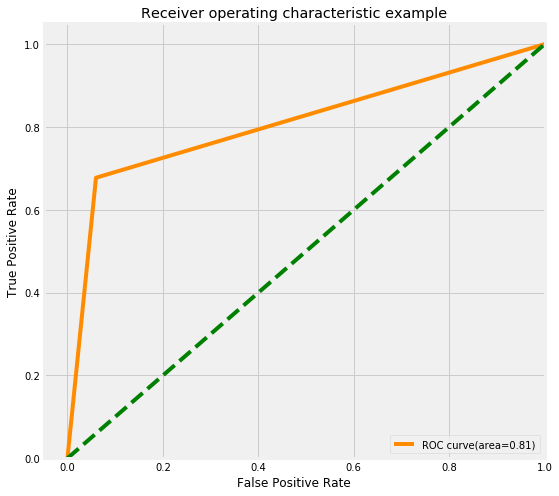

In [94]:
# 画图
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,color='darkorange',label='ROC curve(area=%0.2f)'%roc_auc)
# 设定的假正率是横坐标，真正率是纵坐标
plt.plot([0,1],[0,1],color='green',linestyle='--')

# 设置边界
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
# 设置标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# 设置标题
plt.title('Receiver operating characteristic example')
# 设置图例
plt.legend(loc='lower right');

- 混淆矩阵 cross_val_predict

In [97]:
from sklearn.model_selection import cross_val_predict 

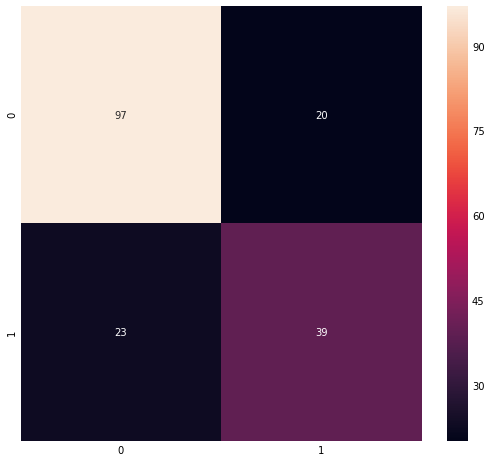

In [101]:
plt.figure(figsize=(8,8))

DTC_good=DecisionTreeClassifier(criterion='gini',max_depth=7,
                                min_samples_leaf=5,min_samples_split=2)
DTC_good.fit(Xtrain,Ytrain)
DTC_good.score(Xtest,Ytest)
y_pre=KNN.predict(Xtest)
sns.heatmap(confusion_matrix(Ytest,y_pre),annot=True,fmt='2.0f');
# annot=True 显示数字
# fmt 数值的输出格式 设置成了整数

以上就是我对泰坦尼克号输出的探索的一些个人的思路和想法，或有不足之处，希望能收到指点纠正。